In [1]:
%reload_ext nb_black
%load_ext autoreload
%autoreload 2

<IPython.core.display.Javascript object>

In [2]:
from sklearn.datasets import make_classification

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from targen.data import target
import seaborn as sns

<IPython.core.display.Javascript object>

## Create features

In [3]:
n_samples = 20000
data = pd.DataFrame(
    {
        "col_0": np.random.uniform(size=n_samples),
        "col_1": np.random.uniform(size=n_samples),
    }
)

<IPython.core.display.Javascript object>

## Create expressions for the target

In [4]:
expressions_target = {}
# linear component
expressions_target["non_linear"] = {
    "weight": 0.9,
    "expr": "-(col_0-0.5) + (col_1-0.5)**2",
}
expressions_target["uniform_noise"] = {"weight": 1.3}


expressions_selection = {}
# linear component
expressions_selection["linear"] = {"weight": 1, "expr": "0.9*(col_0) -0.2*(col_1)-0.2"}
expressions_selection["uniform_noise"] = {"weight": 0}

<IPython.core.display.Javascript object>

In [5]:
df_score_target = target.get_target_and_contributions(
    data,
    expressions=expressions_target,
    q_clip=(0.01, 0.99),
    rescale_contributions=True,
    imbalance=0.1,
    drop_features=False,
)

df_score_selection = target.get_target_and_contributions(
    data,
    expressions=expressions_selection,
    q_clip=(0.01, 0.99),
    rescale_contributions=True,
    imbalance=0.9,
    drop_features=False,
)

<IPython.core.display.Javascript object>

In [6]:
{col: f"{col}_target" for col in df_score_target.columns if col.startswith("score")}

{'score_non_linear': 'score_non_linear_target',
 'score_uniform_noise': 'score_uniform_noise_target',
 'score_pred': 'score_pred_target',
 'score_total': 'score_total_target'}

<IPython.core.display.Javascript object>

In [7]:
df_score_target = df_score_target.rename(
    columns={
        col: f"{col}_target"
        for col in df_score_target.columns
        if col.startswith("score")
    }
)
df_score_selection = df_score_selection.rename(
    columns={
        col: f"{col}_sel"
        for col in df_score_selection.columns
        if col.startswith("score")
    }
)

df_score_selection = df_score_selection.rename(columns={"y": "is_selected"})

<IPython.core.display.Javascript object>

In [8]:
exp_data = pd.concat(
    [df_score_target, df_score_selection.drop(["col_0", "col_1"], axis=1)], axis=1
)

<IPython.core.display.Javascript object>

In [9]:
exp_data.head()

,col_0,col_1,score_non_linear_target,score_uniform_noise_target,score_pred_target,score_total_target,y,score_linear_sel,score_uniform_noise_sel,score_pred_sel,score_total_sel,is_selected
0,0.359912,0.662951,0.561789,0.530072,0.561789,1.653650,0,0.342345,1.000000e-08,0.342345,0.684691,1
1,0.704380,0.367964,0.245067,0.951534,0.245067,1.441668,0,0.719521,1.000000e-08,0.719521,1.439042,1
2,0.932431,0.336568,0.049097,0.830532,0.049097,0.928725,0,0.935721,1.000000e-08,0.935721,1.871443,1
3,0.317561,0.293687,0.614087,0.189473,0.614087,1.417647,0,0.378877,1.000000e-08,0.378877,0.757755,1
4,0.630783,0.180620,0.386768,0.253547,0.386768,1.027083,0,0.690120,1.000000e-08,0.690120,1.380241,1


<IPython.core.display.Javascript object>

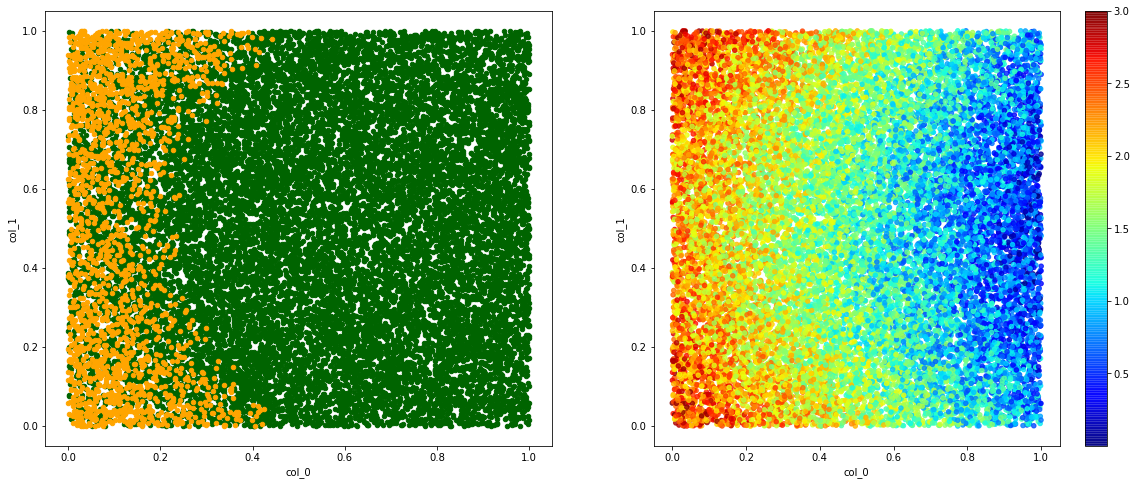

<IPython.core.display.Javascript object>

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
exp_data[exp_data["y"] == 0].plot.scatter(
    x="col_0", y="col_1", ax=ax[0], color="darkgreen"
)
exp_data[exp_data["y"] == 1].plot.scatter(
    x="col_0", y="col_1", ax=ax[0], color="orange"
)
exp_data.plot.scatter(
    x="col_0",
    y="col_1",
    c=exp_data["score_total_target"],
    cmap="jet",
    alpha=0.8,
    ax=ax[1],
)

In [11]:
sel_data = exp_data[exp_data["is_selected"] == 1]

<IPython.core.display.Javascript object>

In [12]:
exp_data["y"].value_counts(normalize=True)

0    0.9
1    0.1
Name: y, dtype: float64

<IPython.core.display.Javascript object>

In [13]:
sel_data["y"].value_counts(normalize=True)

0    0.939611
1    0.060389
Name: y, dtype: float64

<IPython.core.display.Javascript object>

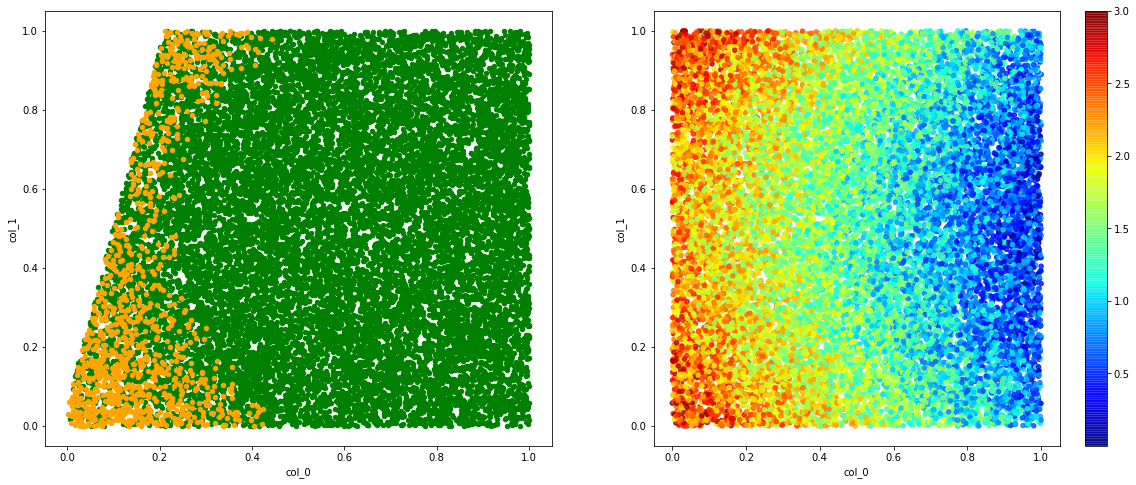

<IPython.core.display.Javascript object>

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
sel_data[sel_data["y"] == 0].plot.scatter(x="col_0", y="col_1", ax=ax[0], color="green")
sel_data[sel_data["y"] == 1].plot.scatter(
    x="col_0", y="col_1", ax=ax[0], color="orange"
)
exp_data.plot.scatter(
    x="col_0",
    y="col_1",
    c=exp_data["score_total_target"],
    cmap="jet",
    alpha=0.8,
    ax=ax[1],
)

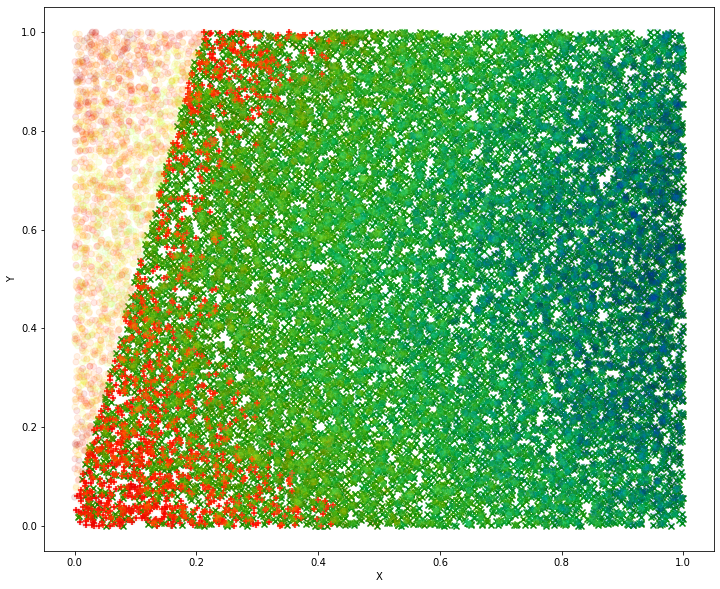

<IPython.core.display.Javascript object>

In [15]:
fig, ax = plt.subplots(figsize=(12, 10))

x_0 = sel_data[sel_data["y"] == 0]["col_0"].values
y_0 = sel_data[sel_data["y"] == 0]["col_1"].values
x_1 = sel_data[sel_data["y"] == 1]["col_0"].values
y_1 = sel_data[sel_data["y"] == 1]["col_1"].values


ax.scatter(x_0, y_0, marker="x", color="green", alpha=1)
ax.scatter(x_1, y_1, marker="+", color="red", alpha=1)

ax.scatter(
    exp_data["col_0"],
    exp_data["col_1"],
    c=exp_data["score_total_target"],
    cmap="jet",
    alpha=0.1,
)
plt.xlabel("X")
plt.ylabel("Y")
plt.savefig(r"C:\Users\Asus\Desktop\Repo\MasterThesis_RI\03_Results\01_Data_Generation_Figures\Fig2.png")

In [16]:
data = exp_data[["col_0", "col_1", "y", "is_selected"]]

<IPython.core.display.Javascript object>

In [17]:
data.to_csv(
    r"C:\Users\Asus\Desktop\Repo\MasterThesis_RI\02_Data\moon1_dr10_rr10.csv",
    index=False,
)

<IPython.core.display.Javascript object>